In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers


In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train.shape ,y_train.shape

((60000, 28, 28), (60000,))

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [11]:
X_train[70]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 113, 120,
        107,  98, 105, 115, 147, 187, 166,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  39, 146, 243, 236, 247,
        255, 254, 255, 248, 255, 214, 238, 255, 182,  70,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 114, 224, 236, 236, 214, 204,
        230, 206, 232, 227, 199, 236, 217, 225, 232, 235,  92,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   0,   0, 220, 224, 214, 206, 254, 239,
        197, 251, 159, 225, 224, 219, 227, 233, 211, 229, 254,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   8,   0, 106, 222, 205, 207, 253, 203,  83,
        197, 203,  51, 255, 117, 126, 231, 210, 219, 217, 221,  46,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 186, 236, 221, 225, 207, 198, 130,
        213, 176,  68, 229, 172,  73, 221, 231, 214, 222, 230, 138,   0,
          0,   0],
       [  0,   0,   0,   3,   0,   0,  92, 208, 241, 217, 231, 234,  69,
        161, 142, 150, 174, 119, 211, 238, 220, 219, 239, 211, 168,   0,
          0,   0],
       [  0,   0,   0,   2,   2,   0,   0,   0,  98, 230, 220, 222, 197,
        209, 255, 228, 228, 235, 204, 212, 219, 250, 179,  41,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,  11, 255, 222, 211,
        251, 192, 218, 230, 201, 224, 223, 247,  34,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   0,   0, 247, 218, 224,
        190, 241, 205, 220, 220, 220, 211, 253,   0,   0,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   4,   0,   0, 248, 229, 209,
        234, 218, 238, 207, 222, 201, 227, 238,   0,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   3,   0,   0, 218, 218, 223,
        222, 228, 237, 223, 217, 224, 213, 241,  44,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,   0,  35, 241, 211, 230,
        200, 223, 224, 217, 212, 211, 206, 228, 127,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   0,  71, 241, 220, 221,
        233, 208, 233, 204, 224, 224, 212, 233, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0, 125, 232, 208, 238,
        208, 233, 222, 227, 207, 210, 209, 223, 183,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0, 172, 238, 223, 221,
        245, 210, 236, 212, 225, 222, 215, 228, 229,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   4,   4,   3,   0,   0, 206, 221, 214, 233,
        196, 237, 200, 234, 207, 219, 206, 217, 212,   7,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 230, 219, 223,
        241, 196, 250, 203, 225, 220, 216, 216, 232,  54,   0,   3,   0,
          0,   0],
       [  0,   0,   0,   0,   6,   0,   0,   0,  21, 255, 189, 232, 230,
        188, 254, 195, 231, 219, 203, 232, 210, 232, 116,   0,   1,   0,
          0,   0],
       [  0,   0,   0, 128, 242, 227, 255, 254, 251, 237, 234, 233, 234,
        226, 196, 249, 213, 219, 235, 197, 224, 230, 193,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 169, 242, 224, 231, 231, 234, 232, 226, 233, 228,
        231, 242, 188, 239, 229, 192, 245, 197, 225, 233,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 197, 230, 225, 231, 224, 224, 228, 229, 229, 230,
        222, 194, 255, 202, 213, 252, 196, 228, 217, 223,   9,   0,   0,
          0,   0],
       [  0,   0,   0, 180, 249, 226, 231, 228, 225, 227, 227, 230, 228,
        227, 235, 201, 224, 231, 198, 225, 223, 202, 232,  36,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 206, 254, 229, 235, 237, 236, 231, 239, 248,
        229, 234, 244, 237, 222, 254, 224, 230, 246, 247, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 241, 24

In [12]:
y_train[70]

np.uint8(3)

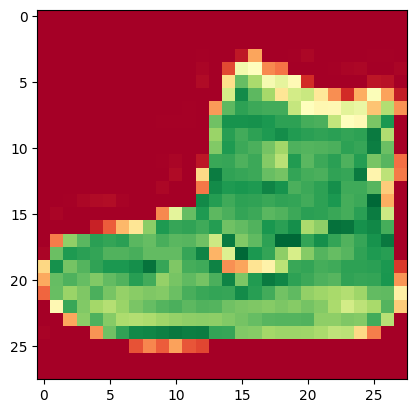

In [13]:
plt.imshow(X_train[0], cmap='RdYlGn')

In [14]:
# Class names for labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

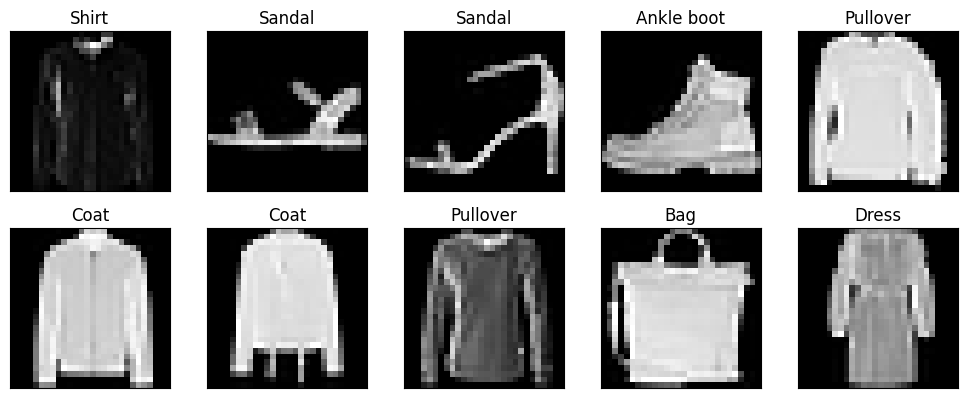

In [15]:
plt.figure(figsize=(10, 10))
for i in range(10):
    index = np.random.randint(0, len(X_train))  # Pick a random index
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[index].reshape(28, 28), cmap='gray')  # If grayscale
    plt.title(class_names[y_train[index]])
plt.tight_layout()
plt.show()

# **Feature Scalling**

In [16]:
X_train.ndim

3

In [17]:
X_train = X_train/255.0
X_test = X_test/255.0

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# **Build Neural Network**

In [19]:
model = keras.Sequential([
    # First Conv Block
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # # Second Conv Block
    # layers.Conv2D(64, (3, 3), padding='same'),
    # layers.BatchNormalization(),
    # layers.Activation('relu'),
    # layers.MaxPooling2D((2, 2)),

    # Flatten + Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 804,682 (3.07 MB)

 Trainable params: 804,618 (3.07 MB)

 Non-trainable params: 64 (256.00 B)

In [21]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

validation_split

You're telling Keras:

“Use 10% of my training data to validate the model after each epoch (not for training, just for checking performance).”
🎯 Why use it?
It helps monitor how well the model generalizes to unseen data.

It gives you a sense of overfitting — if training accuracy is high but validation accuracy is low, your model is memorizing rather than learning.



In [22]:
# Train
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7706 - loss: 0.6742 - val_accuracy: 0.8788 - val_loss: 0.3335
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8688 - loss: 0.3657 - val_accuracy: 0.8928 - val_loss: 0.2941
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8822 - loss: 0.3216 - val_accuracy: 0.8890 - val_loss: 0.2921
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8899 - loss: 0.2947 - val_accuracy: 0.9005 - val_loss: 0.2830
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8999 - loss: 0.2711 - val_accuracy: 0.8878 - val_loss: 0.3092
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9064 - loss: 0.2521 - val_accuracy: 0.9050 - val_loss: 0.2712
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9098 - loss: 0.2403 - val_accuracy: 0.9075 - val_loss: 0.2506
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9168 - loss: 0.2205

# Prediction:



In [23]:
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [24]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


np.int64(9)

In [25]:
y_test[0]

np.uint8(9)

In [26]:
y_pred=model.predict(X_test).round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Evaluate Model

In [27]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9080 - loss: 0.2759


[0.27222320437431335, 0.9068999886512756]

# Visualize Output

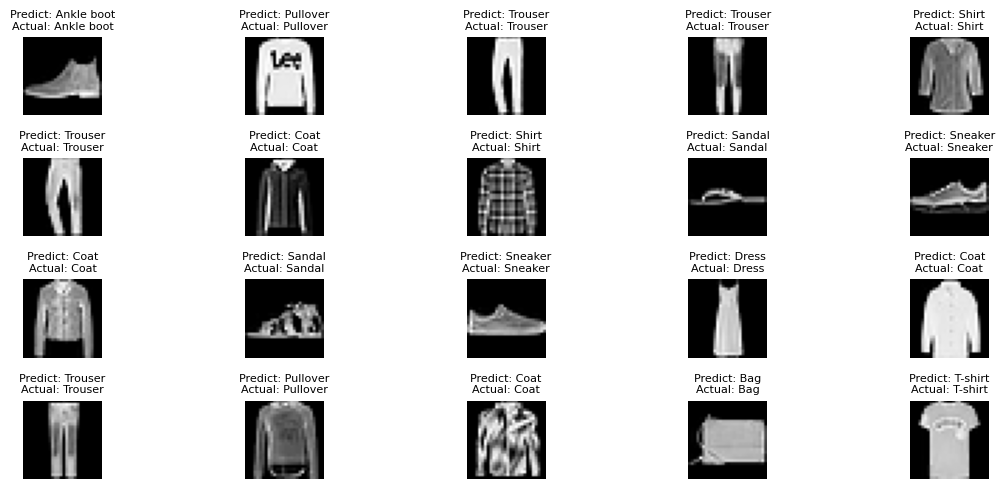

In [28]:
num_images = 20

# Grid size (4 rows x 5 columns)
rows, cols = 4, 5
plt.figure(figsize=(12, 5))  # Width x Height of the whole grid

for i in range(20):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    pred_label = np.argmax(y_pred[i])
    true_label = y_test[i]
    plt.title(f"Predict: {class_names[pred_label]}\nActual: {class_names[true_label]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Confusion Matrix

Text(95.72222222222221, 0.5, 'True')

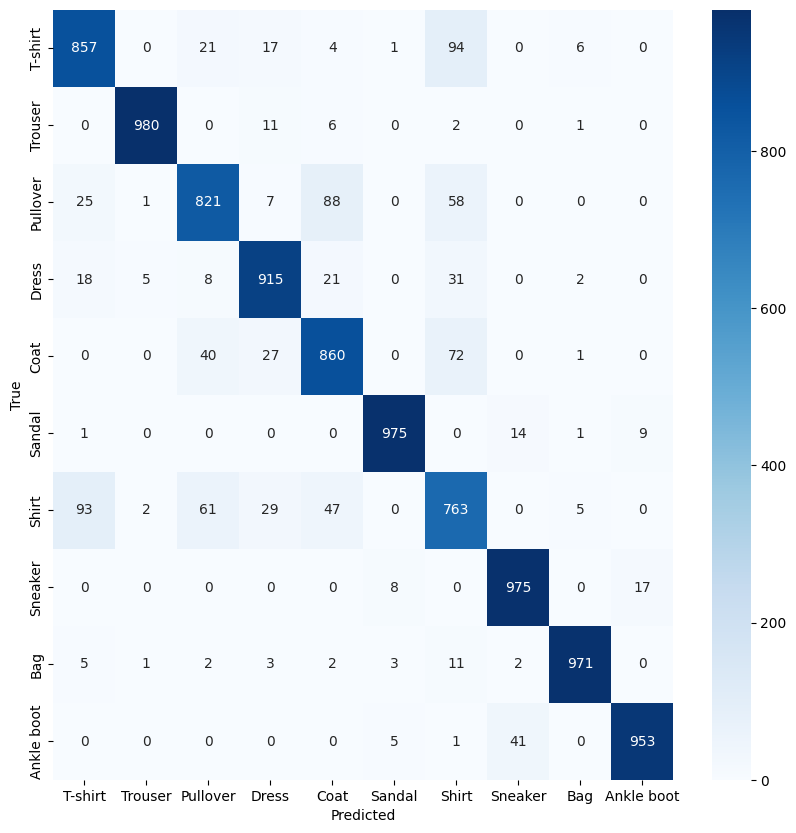

In [29]:
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # Import matplotlib.pyplot

plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax(y_pred, axis=1), target_names=class_names))

              precision    recall  f1-score   support

     T-shirt       0.86      0.86      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.82      0.84      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.84      0.86      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.74      0.76      0.75      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

